### IDs:
Insert yours IDs to the cell below

ID #1: 301672028

ID #2: 204502926

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_boston
from scipy.stats import cumfreq
from scipy.stats import norm
from scipy.stats import geom
from scipy.stats import uniform
from scipy.stats import binom

warnings.filterwarnings("ignore")

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

***
#### 1 - Answer

In [2]:
dataset = load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The boston house-prices dataset.
This dataset contains 506 rows (instances), with 13 features each.
If True, returns (data, target) instead of a Bunch object.

X is a numpy.ndarray of shape (506, 13) - The data matrix where each cell is a numpy.float64
y is a numpy.ndarray of shape (506, ) - a one liner - The regression target (numpy.float64)

In [3]:
# by creating a dataframe, it is easier to read and use the data
df_dataset = pd.DataFrame(data= dataset['data'], columns= dataset['feature_names'])
df_dataset['price'] = dataset['target']
df_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### 1.2 - Answer

Text(0,0.5,'# of houses')

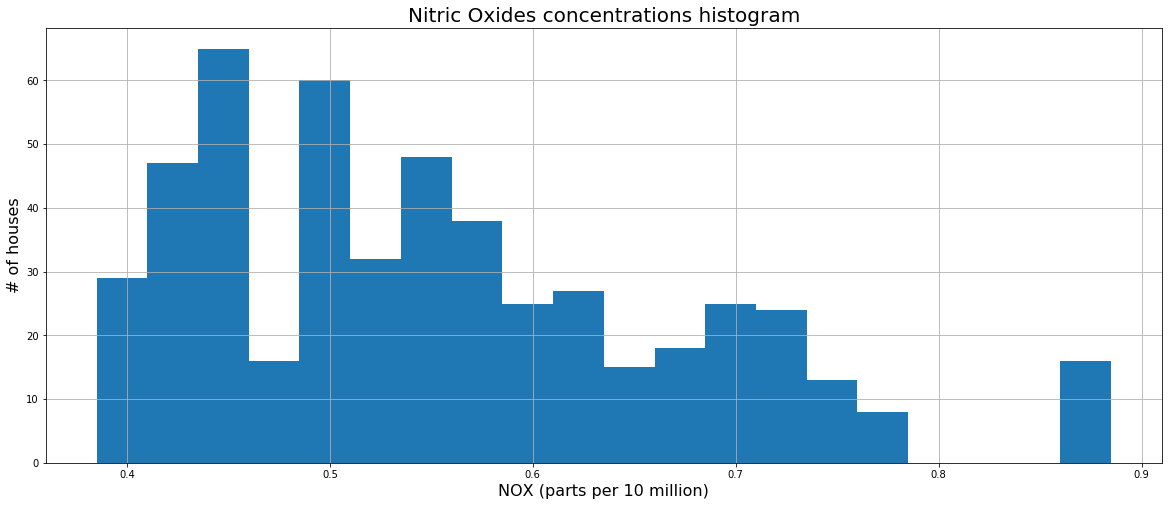

In [4]:
# Produce a histogram of the Nitric Oxides concentrations
plt.figure(figsize=(20,8))
bin_width = 0.025 # makes the distribution clearer
bins = np.arange(min(df_dataset['NOX']), max(df_dataset['NOX']) + bin_width, bin_width)
df_dataset['NOX'].hist(bins=bins)
plt.title('Nitric Oxides concentrations histogram', fontsize=20)
plt.xlabel('NOX (parts per 10 million)', fontsize=16)
plt.ylabel('# of houses', fontsize=16)

<!-- describe the distribution -->
We get a right-skewed histogram distribution, where the amount of houses extends to the right gets smaller while most values cluster on the left.<br>
The highest concentrarion of Nitric oxide is between 0.4-0.5<br>
This is a measure for Indoor Air Quality.<br>
In a histogram, outliers appear as an isolated bar, so we suspect that the righmost measurments are such (~0.88).<br>

Text(0,0.5,"Values' range")

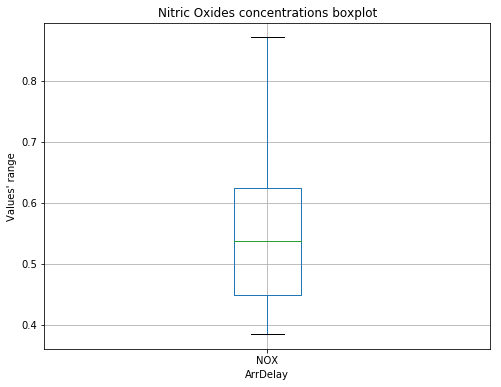

In [5]:
# Boxplot for the Nitric Oxides concentrations measurments
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
df_dataset.boxplot(column='NOX', ax=ax)
ax.set_title('Nitric Oxides concentrations boxplot')
ax.set_xlabel('ArrDelay')
ax.set_ylabel('Values\' range')

The box is drawn from Q1 (starting at \~0.45) to Q3 (starting at \~0.62) with a horizontal line drawn in the middle to denote the median (\~0.53)
As we learned in recitation, the box holds 50% of the values - Interquartile range (IQR)

##### 1.3 - Answer

In [6]:
correlation_matrix = df_dataset.corr()

Let's also show a heatmap for the correlarions, so we can find a correlations more intuitively and visually with colors instead of just numbers:

Text(0.5,1,'Correlation matrix heatmap')

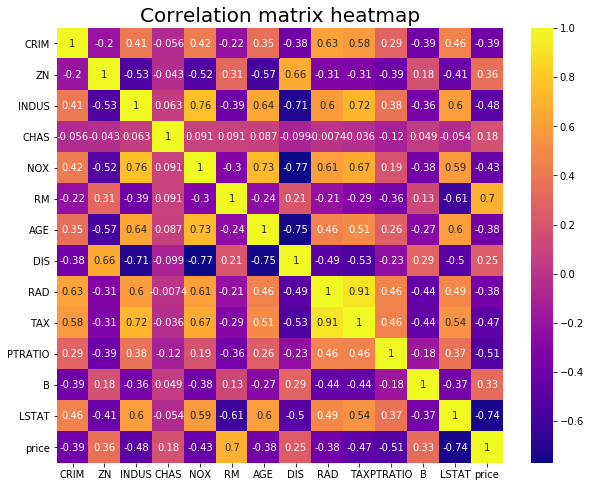

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title("Correlation matrix heatmap", fontsize=20)

We can spot with our eyes a high correlation (brightest color not on main diagonal) between **RAD** and **TAX** (0.91)<br>
(RAD: index of accessibility to radial highways)<br>
(TAX: full-value property-tax rate per $10,000)

There also seems to be a negative correlation between:
<ul>
  <li>LSTAT and price</li>
  <li>DIS and AGE</li>
  <li>DIS and NOX</li>
  <li>DIS and INDUS</li>
    <p>All with a value of ~-0.7x<p>
</ul>

**CHAS** seems to have an unusual behaviour since it is the only feature who has no correlation to any other feature.<br>
But, looking at the description of the dataset, we see it's a boolean variable (0 or 1), and its condition is not satisfies for any house in the dataset apparently.

##### 1.4 - Answer

Let's make a table of all correlations between all different pairs in decreasing correlation values and see which features we need for our plots:

In [8]:
correlation_table = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

correlation_table

RAD    TAX      0.910228
INDUS  NOX      0.763651
NOX    AGE      0.731470
INDUS  TAX      0.720760
RM     price    0.695360
                  ...   
       LSTAT   -0.613808
INDUS  DIS     -0.708027
LSTAT  price   -0.737663
AGE    DIS     -0.747881
NOX    DIS     -0.769230
Length: 91, dtype: float64

The highest correlations are **RAD** and **TAX** (0.91), as we saw in the heatmap, and the second highest (negative) correlation is **NOX** and **DIS** (-0.769)

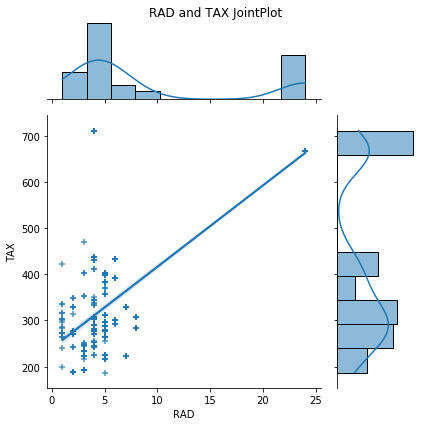

In [9]:
p = sns.jointplot(data=df_dataset, x='RAD', y='TAX', kind='reg', marker='+', height=6, ratio=3)
p.fig.suptitle('RAD and TAX JointPlot')
p.fig.subplots_adjust(top=0.95) # Reduce plot to make room for title

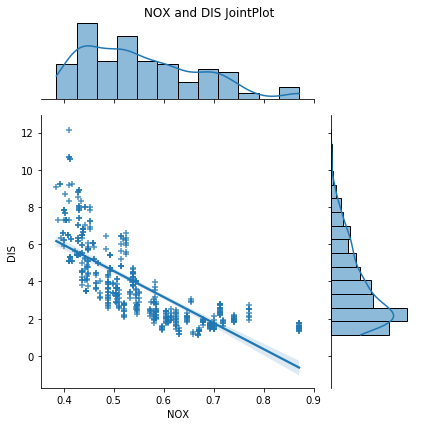

In [10]:
p = sns.jointplot(data=df_dataset, x='NOX', y='DIS', kind='reg', marker='+', height=6, ratio=3)
p.fig.suptitle('NOX and DIS JointPlot')
p.fig.subplots_adjust(top=0.95)

##### 1.5 - Answer

25'th percentile at x: 45.025, y: 134.0
75'th percentile at x: 94.07499999999999, y: 389.0


<Figure size 576x504 with 0 Axes>

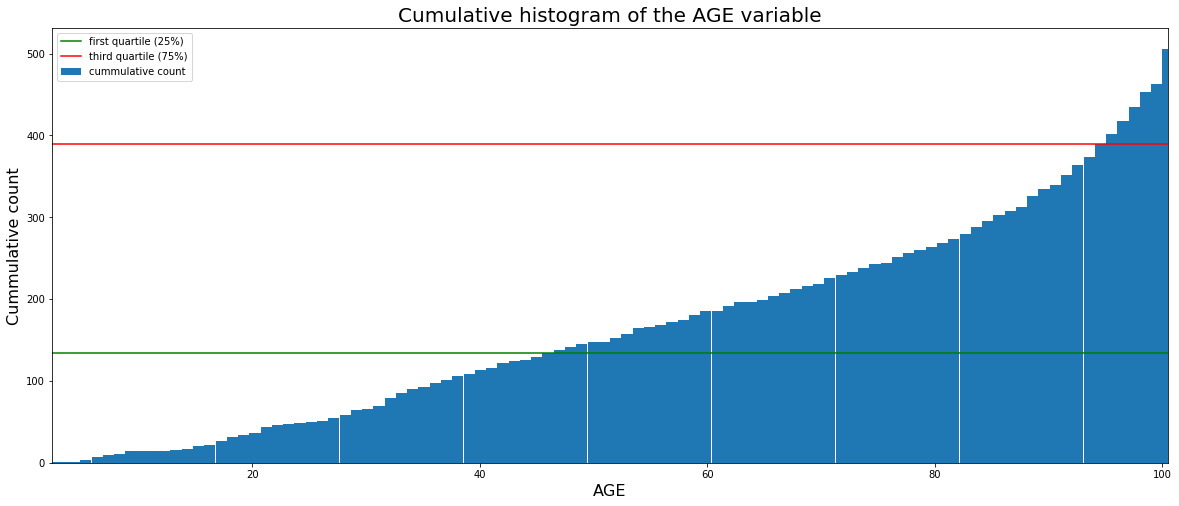

In [11]:
# with a help from this example https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cumfreq.html
samples = df_dataset['AGE']
age_cummulative_frequency = cumfreq(samples, numbins=100)

fig = plt.figure(figsize=(8,7))
x = age_cummulative_frequency.lowerlimit + np.linspace(0, age_cummulative_frequency.binsize * age_cummulative_frequency.cumcount.size,
                                                       age_cummulative_frequency.cumcount.size)
age_percentile_25 = np.percentile(samples, 25)
age_percentile_25_count = age_cummulative_frequency.cumcount[np.where(x - age_percentile_25 > 0)[0][0]]
print(f'25\'th percentile at x: {age_percentile_25}, y: {age_percentile_25_count}')

age_percentile_75 = np.percentile(samples, 75)
age_percentile_75_count = age_cummulative_frequency.cumcount[np.where (x - age_percentile_75 > 0)[0][0]]
print(f'75\'th percentile at x: {age_percentile_75}, y: {age_percentile_75_count}')

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
ax.bar(x, age_cummulative_frequency.cumcount, width=age_cummulative_frequency.binsize, label='cummulative count')
ax.axhline(y=age_percentile_25_count, label='first quartile (25%)', color='g')
ax.axhline(y=age_percentile_75_count, label='third quartile (75%)', color='r')
ax.set_title('Cumulative histogram of the AGE variable', fontsize=20)
ax.set_xlim([x.min(), x.max()])
ax.set_xlabel('AGE', fontsize=16)
ax.set_ylabel('Cummulative count', fontsize=16)
plt.legend()

##### 1.6 - Answer

1. There is some positive correlation (0.77) between DIS and NOX: the weighted distances to five Boston employment centres, and the air quality in houses.<br>
It implies that the city center is more polluted, as we would expect, due to a lot of cars of people going to work, and it cool to see it in the data.

2. There is some negative correlation (-0.75) between DIS and AGE: the weighted distances to five Boston employment centres, and the age of houses.<br>
It implies that the further houses are older than those on the center - maybe the city renovates only where it's more financial for it.

***
### Question 2 - Independence and conditional independence

#### 2.A
Can we define a three dimensional multivariate gaussian that is pairwise-independent but not collectivley independent?
If your answer is yes, provide an example.
If your answer is no, provide a proof.

##### Answer

**NO** - A three dimensional multivariate gaussian that is pairwise-independent CANNOT be collectivley dependent (meaning, it must be collectivley independent).

<u>Proof</u>:<br>
If the 3 Gaussians are pairwise-independent, their covariance-matrix is diagonal (as seen in lecture 4):
$$\begin{vmatrix}
\sigma_1^2 & 0 & 0 \\
0 &  \sigma_2^2 & 0 \\
0 &  0 & \sigma_3^2
\end{vmatrix}$$

Now, we get 3 independent Gaussians ######################################################


#### 2.B
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

##### Answer

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

##### Answer

#### 2.D
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

##### Answer

#### 2.E
For the random variables from the previous section, let $n=m=2$ and $k=2$. Give and example for a joint distribution of $\ X, Y \ $ and $Z$ where $X$ and $Y$ are conditionaly independent given $Z$?

##### Answer

***
### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD_2021.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3\ \ $. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

##### Answer

First, let\'s visualize the data by plotting a Histogram:

Text(0,0.5,'# of occurrences')

<Figure size 576x504 with 0 Axes>

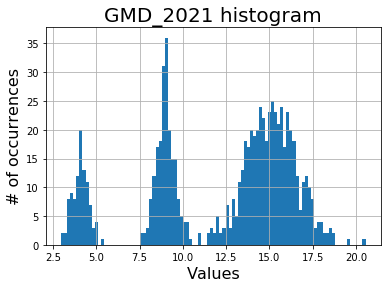

In [12]:
df_gmd = pd.read_csv('GMD_2021.csv', index_col=0, header=None)
plt.figure(figsize=(8,7))
df_gmd.hist(bins=100)
plt.title('GMD_2021 histogram', fontsize=20)
plt.xlabel('Values', fontsize=16)
plt.ylabel('# of occurrences', fontsize=16)

We can already see the 3 distributions.<br>
Plus, we can spot the given $\mu_1$ and $\mu_2$ (4 & 9, respectively) and we see another distribution centered around 15 so we can conclude it is $\mu_3$.<br>

To estimate $w_3$:

In [13]:
cummulative_count = df_gmd[1].value_counts(bins=10, sort=False)
print(cummulative_count)

(2.951, 4.729]       92
(4.729, 6.488]        8
(6.488, 8.247]       15
(8.247, 10.006]     177
(10.006, 11.764]     16
(11.764, 13.523]     59
(13.523, 15.282]    206
(15.282, 17.041]    175
(17.041, 18.8]       50
(18.8, 20.559]        2
Name: 1, dtype: int64


There are (15+177+16) =~ 208 instances around the centered normal distribuiton and (59+206+175+50+2)~=492 around the rightmost distribution, so we can assume that $w_3 = 2.5*w_2 = 0.625$<br>
Since $\sum_{i=1}^3 w_i = 1$, we say that $w_1=1-0.25-0.625=0.125$

##### Another option to estimate the missing parameters is to use the **EM (Expectation Maximization)** algorithm, as learned in class:

We initialize the missing $\mu_3$ value based on the inferences from the histogram part above, but we could also initialize it randomly. 

In [14]:
mu_1 = 4 # given
mu_2 = 9 # given
mu_3 = 15 # from visualizing the histogram

# given:
sigma_1 = 0.5
sigma_2 = 0.5
sigma_3 = 1.5

# ws are 0.5 (for starts)
w_1 = 0.5
w_2 = 0.5
w_3 = 0.5

df_1 = pd.DataFrame([[mu_1, sigma_1, w_1]], columns=['mean', 'sigma', 'w'])
df_2 = pd.DataFrame([[mu_2, sigma_2, w_2]], columns=['mean', 'sigma', 'w'])
df_3 = pd.DataFrame([[mu_3, sigma_3, w_3]], columns=['mean', 'sigma', 'w'])


def compute_responsibilities(data):
    p_1 = df_1['w'].values * norm.pdf(data, loc=df_1['mean'], scale=df_1['sigma'])
    p_2 = df_2['w'].values * norm.pdf(data, loc=df_2['mean'], scale=df_2['sigma'])
    p_3 = df_3['w'].values * norm.pdf(data, loc=df_3['mean'], scale=df_3['sigma'])
    
    denominator = (p_1 + p_2 + p_3)

    r_1 = p_1 / denominator
    r_2 = p_2 / denominator
    r_3 = p_3 / denominator
    
    return r_1, r_2, r_3


def compute_new_assignments(r_1, r_2, r_3, number_of_records):
    new_w_1 = r_1.sum() / number_of_records
    new_w_2 = r_2.sum() / number_of_records
    new_w_3 = r_3.sum() / number_of_records
    new_mu_3 = (r_3 * data).sum().values / (new_w_3 * number_of_records)

    return new_w_1, new_w_2, new_w_3, new_mu_3

################################

MAXIMUM_ITERATIONS = 1000
EPSILON = 0.00001
data = df_gmd
number_of_records = data.shape[0]

for i in range(MAXIMUM_ITERATIONS):
    r_1, r_2, r_3 = compute_responsibilities(data)
    new_w_1, new_w_2, new_w_3, new_mu_3 = compute_new_assignments(r_1, r_2, r_3, number_of_records)

    # stop condition
    if np.isclose(new_w_1, df_1['w'], atol=EPSILON) and \
            np.isclose(new_w_2, df_2['w'], atol=EPSILON) and \
            np.isclose(new_w_3, df_3['w'], atol=EPSILON) and \
            np.isclose(new_mu_3, df_3['mean'], atol=EPSILON):
        print(f'Convergence reached after {i} iterations')
        break
    
    df_1['w'] = new_w_1
    df_2['w'] = new_w_2
    df_3['w'] = new_w_3
    df_3['mean'] = new_mu_3

df_result = pd.concat([df_1, df_2, df_3], axis=0)
df_result.index = ['leftmost dist.', 'centered dist.', 'rightmost dist.']
df_result

Convergence reached after 3 iterations


,mean,sigma,w
leftmost dist.,4.000000,0.5,0.125000
centered dist.,9.000000,0.5,0.249811
rightmost dist.,15.101056,1.5,0.625189


We see that the estimates that the EM algorithm provides us are **VERY** similar to the ones we predicted above!
It means that we did a good job with the visulaiztion and the counting of instances per distribuiton above.
That's why it took us only 3 iterations until reached convergence :)<br>
(The w's sum up to 1, so we can be assured it worked properly)

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

##### Answer

x is the range of minimal and maximal values in the dataset (+1 to each side).<br>
y is the sum of three normal distributions.

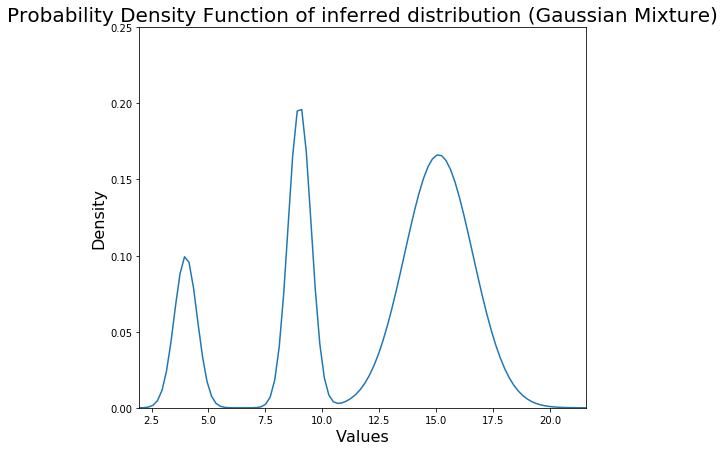

In [17]:
distribution_1 = df_result.loc['leftmost dist.', 'w'] * norm.pdf(x, loc=df_result.loc['leftmost dist.', 'mean'], scale=df_result.loc['leftmost dist.', 'sigma'])
distribution_2 = df_result.loc['centered dist.', 'w'] * norm.pdf(x, loc=df_result.loc['centered dist.', 'mean'], scale=df_result.loc['centered dist.', 'sigma'])
distribution_3 = df_result.loc['rightmost dist.', 'w'] * norm.pdf(x, loc=df_result.loc['rightmost dist.', 'mean'], scale=df_result.loc['rightmost dist.', 'sigma'])

x = np.linspace(df_gmd.min()-1, df_gmd.max()+1, num=100)
y = distribution_1 + distribution_2 + distribution_3

plt.figure(figsize=(8,7))
plt.plot(x, y)
plt.title('Probability Density Function of inferred distribution (Gaussian Mixture)', fontsize=20)
plt.xlabel('Values', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.xlim(df_gmd.min().values -1, df_gmd.max().values + 1)
plt.ylim(0, 0.25) # all densities are smaller than 0.25
plt.show()

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  $\mu_1+3, \mu_2+5, mu_3+7$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

##### Answer

<u>Option 1</u>:<br>
Sample n/3 values from each of the distributions $X \sim N(\mu_1 + 3, 1)$, $Y \sim N(\mu_2 + 5, 1)$ and $Z \sim N(\mu_3 + 7, 1)$

<u>Option 2</u>:<br>
Take a uniform distribuiton, X, which outputs a number between 0 to 1, and based on the result, choose a random item from one of the given normal distributions.
Do this process n times, and you'll randomly choose n items, with on average you'll end up with n/3 items picked from each distribution.
(A similar example was given in the 3rd recitation with flipping a coin and then choosing an item from 2 distributions according to the coin toss result)


<!-- Option 2:<br>
1. Compute PDF of this Gaussian Mixture:<br>
$$f(x)=\sum_{i=1}^{2}(w_if_i(x)) =$$
$$w_1 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-(\mu_1+3))^2} {2\sigma_1}} + w_2 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-(\mu_2+5))^2} {2\sigma_2}} + w_3 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-(\mu_3+7))^2} {2\sigma_3}} =$$
$$0.33 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-7)^2} {2}} + 0.33 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-14)^2} {2}} + 0.33 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-22)^2} {2}}$$
2. Compute CDF for this PDF:
 -->

#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


##### Answer

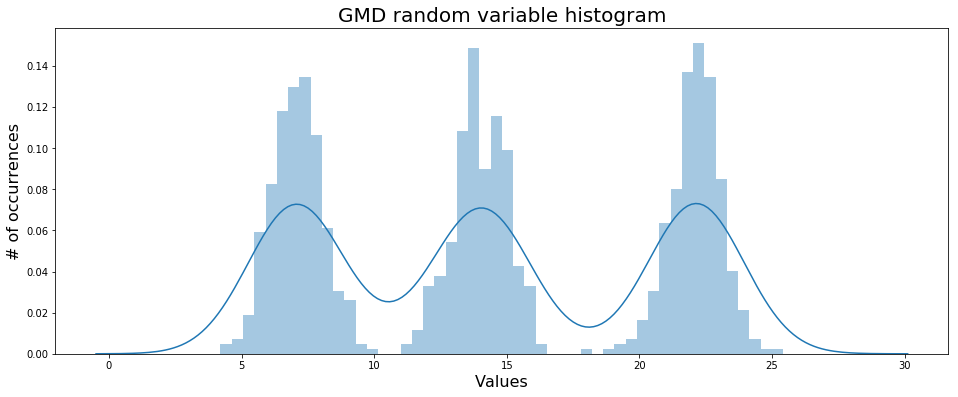

In [178]:
np.random.seed(1) # for consistency
n = 1000
instances_per_distribution = int(n/3)
sigma = 1

distribution_1 = np.random.normal(loc=df_result.loc['leftmost dist.', 'mean'] + 3, scale=sigma, size=instances_per_distribution)
distribution_2 = np.random.normal(loc=df_result.loc['centered dist.', 'mean'] + 5, scale=sigma, size=instances_per_distribution)
distribution_3 = np.random.normal(loc=df_result.loc['rightmost dist.', 'mean'] + 7, scale=sigma, size=instances_per_distribution)

merged_distribution = np.append(np.append(distribution_1, distribution_2), distribution_3)

# plot gmm
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(merged_distribution, bins=50)
plt.title('GMD random variable histogram', fontsize=20)
plt.xlabel('Values', fontsize=16)
plt.ylabel('# of occurrences', fontsize=16)
plt.show()

#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


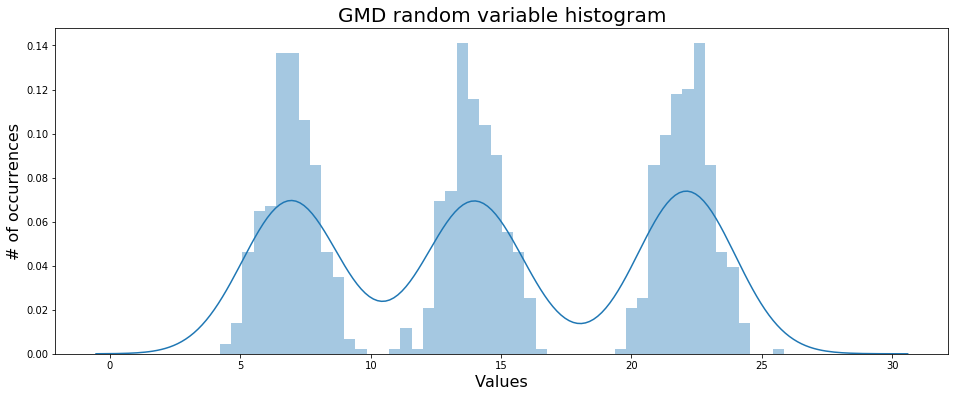

In [180]:
np.random.seed(1) # for consistency
n = 1000
sigma = 1
w_1 = w_2 = w_3 = 0.33

gmm_data = []

distribution_1 = np.random.normal(loc=df_result.loc['leftmost dist.', 'mean'] + 3, scale=sigma, size=n)
distribution_2 = np.random.normal(loc=df_result.loc['centered dist.', 'mean'] + 5, scale=sigma, size=n)
distribution_3 = np.random.normal(loc=df_result.loc['rightmost dist.', 'mean'] + 7, scale=sigma, size=n)

for i in range(n):
    p = uniform.rvs(size=1)
    
    if p < w_1:
        gmm_data.append(np.random.choice(a=distribution_1, size=1))
    elif p >= w_1 and p < 2 * w_2:
        gmm_data.append(np.random.choice(a=distribution_2, size=1))
    else: # p >= 0.66
        gmm_data.append(np.random.choice(a=distribution_3, size=1))

# plot gmm
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
sns.distplot(gmm_data, bins=50)
plt.title('GMD random variable histogram', fontsize=20)
plt.xlabel('Values', fontsize=16)
plt.ylabel('# of occurrences', fontsize=16)
plt.show()

Comparison:

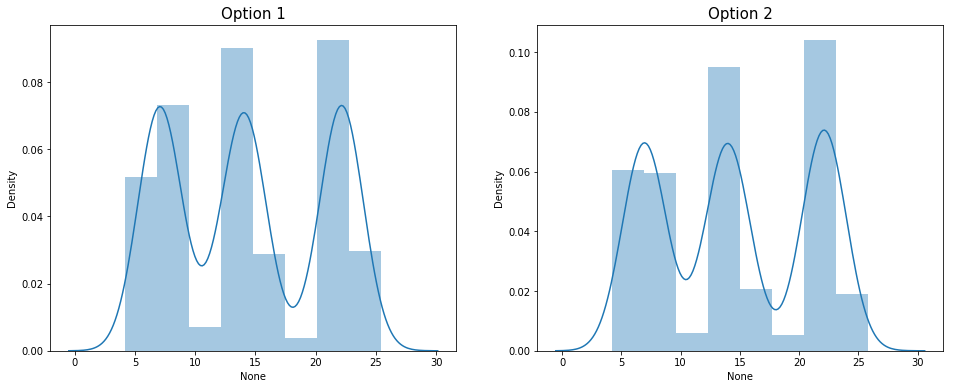

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(merged_distribution, ax=ax[0])
ax[0].set_title('Option 1', fontdict={'fontsize': 15})
sns.distplot(gmm_data, ax=ax[1])
ax[1].set_title('Option 2', fontdict={'fontsize': 15})
plt.show()

***
### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 70,000 RCU and a standard deviation of 30,000 RCU.

In [29]:
# A normal CONTINUOUS random variable.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
mean = 70000
sigma = 30000

#### 4.A
What percent of people earn less than 50,000 RCU?

##### Answer

In [59]:
# Calculate CDF for x = 50000
target = 50000
norm_cdf = norm.cdf(target, loc=mean, scale=sigma)
print('{:.2f}% of people earn less than {:.0f} RCU'.format(norm_cdf*100, target))

25.25% of people earn less than 50000 RCU


#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

##### Answer

In [67]:
# CDF(X <= 65000) - CDF(X <= 45000)
high = 65000
low = 45000
norm_cdf = norm.cdf(high, loc=mean, scale=sigma) - norm.cdf(low, loc=mean, scale=sigma)
print('{:.2f}% of people earn between {:.0f} RCU and {:.0f} RCU'.format(norm_cdf*100, low, high))

23.15% of people earn between 45000 RCU and 65000 RCU


#### 4.C
What percent of people earn more than 70,000 RCU?

##### Answer

In [72]:
# amount = 1 - CDF(X <= 70000)
target = 70000
norm_cdf = 1 - norm.cdf(target, loc=mean, scale=sigma)
print('{:.0f}% of people earn more than {:.0f} RCU'.format(norm_cdf*100, target))

50% of people earn more than 70000 RCU


(by definition of "mean")

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

##### Answer

In [81]:
n = 1000
target = 140000
norm_cdf = 1 - norm.cdf(target, loc=mean, scale=sigma) # probability value for one employee to earn more than {target} RCU
result_per_n = norm_cdf * n # can be rounded to nearest integer

print('We expect {:.2f} employees to earn more than {:.0f} RCU'.format(result_per_n, target))

We expect 9.82 employees to earn more than 140000 RCU


#### 4.E
A survey is performed on employees of the company. **20 groups of 50 employees each are sampled (with replacenets).**
What is the probability that more than 10 groups have an average salary between 50,000 RCU and 70,000 RCU?

##### Answer

This is a binomial dist. composed of normal dist.s where p = probability for a single employee to earn in this range

In [201]:
groups = 20
employees_per_group = 50
desired_number_of_groups = 10
low = 50000
high = 70000

# CDF(X <= high) - CDF(X <= low)
norm_cdf_single_employee = norm.cdf(high, loc=mean, scale=sigma) - norm.cdf(low, loc=mean, scale=sigma) # probability for a single employee's salary to be in this range
print('Probability of {:.2f} for a single employee\'s salary to be in this range.'.format(norm_cdf_single_employee))

# more than n groups = 1 cdf(n, groups, p)
per_group_probability = 1 - binom.cdf(desired_number_of_groups, groups, norm_cdf_single_employee)
print('Probability of {:.2f} that more than {:.0f} groups have an average salary in this range.'.format(per_group_probability, desired_number_of_groups))

Probability of 0.50 for a single employee's salary to be in this range.
Probability of 0.41 that more than 10 groups have an average salary in this range.


***
### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

##### Answer

In [ ]:
# E(T_N) = E()

In [ ]:
def compute_expectation(T_n):
    

#### 5.B
Write code to compute the exact value of $V(T_{N})$

##### Answer

#### 5.C
Write code to exactly compute $P(T_{20}>40)$

##### Answer

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

##### Answer